In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker


In [2]:
data = pd.read_csv('data//evaluations.csv', delimiter='|', dtype={"config": str})
data

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
0,1,prompt_1.log,2025-07-22 12:37:47,2025-07-22 12:51:23,13min 36sec,816,False,success,False,28992,1008,30000,6,1138414,48205,1186619,69,75,linters-off,Create a simple web app called Plant Care Trac...
1,1,prompt_1.log,2025-07-23 13:50:15,2025-07-23 14:01:13,10min 58sec,658,False,success,False,20933,982,21915,6,962658,39613,1002271,77,83,types-off,Create a simple web app called Plant Care Trac...
2,2,prompt_2.log,2025-07-22 21:51:03,2025-07-22 22:01:22,10min 19sec,619,False,success,False,27907,1054,28961,6,962959,33413,996372,61,67,linters-off,Make a Roommate Chore Wheel that randomly assi...
3,2,prompt_2.log,2025-07-23 14:08:41,2025-07-23 14:23:19,14min 38sec,878,False,success,False,29731,889,30620,6,2236555,45924,2282479,123,129,types-off,Make a Roommate Chore Wheel that randomly assi...
4,3,prompt_3.log,2025-07-23 11:00:35,2025-07-23 11:13:03,12min 28sec,748,False,success,False,22660,950,23610,6,1251805,37280,1289085,109,115,linters-off,Build a dashboard to monitor car maintenance h...
5,3,prompt_3.log,2025-07-23 14:31:22,2025-07-23 14:42:34,11min 12sec,672,False,success,False,39318,1537,40855,6,1326890,43026,1369916,68,74,types-off,Build a dashboard to monitor car maintenance h...
6,4,prompt_4.log,2025-07-23 13:51:44,2025-07-23 13:59:35,7min 51sec,471,False,success,False,22832,1022,23854,6,403567,21777,425344,45,51,linters-off,Build a simple web app that suggests if tomorr...
7,4,prompt_4.log,2025-07-23 14:53:35,2025-07-23 15:02:08,8min 33sec,513,False,success,False,26495,1266,27761,6,500614,26013,526627,40,46,types-off,Build a simple web app that suggests if tomorr...
8,5,prompt_5.log,2025-07-23 05:41:25,2025-07-23 05:51:04,9min 39sec,579,False,success,False,19322,1043,20365,6,513263,23001,536264,66,72,linters-off,Build a currency conversion app that takes an ...
9,5,prompt_5.log,2025-07-23 15:07:38,2025-07-23 15:17:43,10min 05sec,605,False,success,False,25118,647,25765,6,1274113,37468,1311581,70,76,types-off,Build a currency conversion app that takes an ...


In [3]:
data_group = data.groupby('config')

success_rate = data_group['build_status'].apply(lambda x: (x == 'success').mean()).reset_index(name='success_rate')

success_rate

,config,success_rate
0,all-on,1.000000
1,linters-off,0.800000
2,types-off,0.933333


In [4]:
median_gen_time = data_group['gen_time_seconds'].median().reset_index(name='median_gen_time_sec')
median_gen_time

,config,median_gen_time_sec
0,all-on,474.0
1,linters-off,748.0
2,types-off,562.0


In [5]:
performance_summary = pd.merge(success_rate, median_gen_time, on='config')

performance_summary = performance_summary.sort_values(by=['success_rate', 'median_gen_time_sec'], ascending=[False, True])

performance_summary

,config,success_rate,median_gen_time_sec
0,all-on,1.000000,474.0
2,types-off,0.933333,562.0
1,linters-off,0.800000,748.0


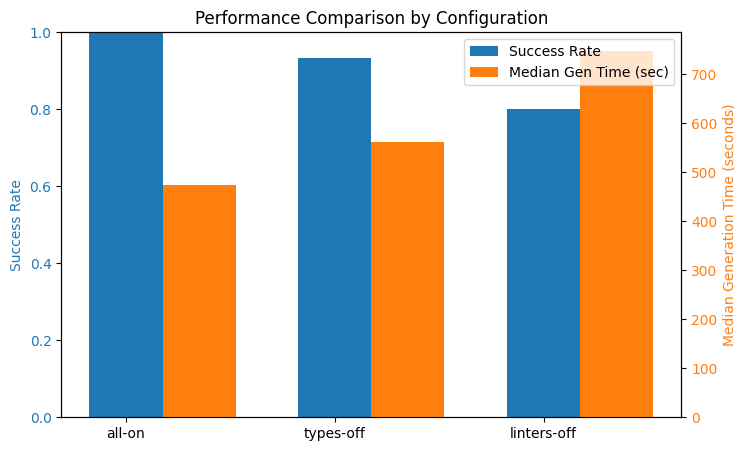

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 5))

configs = performance_summary['config']
success_rates = performance_summary['success_rate']
avg_times = performance_summary['median_gen_time_sec']

bar_width = 0.35
index = range(len(configs))

bars1 = ax1.bar(index, success_rates, bar_width, label='Success Rate', color='tab:blue')
ax1.set_ylabel('Success Rate', color='tab:blue')
ax1.set_ylim(0, 1)
ax1.set_xticks(index)
ax1.set_xticklabels(configs)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], avg_times, bar_width, label='Median Gen Time (sec)', color='tab:orange')
ax2.set_ylabel('Median Generation Time (seconds)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Performance Comparison by Configuration')
plt.show()

In [7]:
data_group.get_group("linters-off")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,15.000000,1.500000e+01,15.000000,1.500000e+01
mean,729.666667,1.728261e+06,38602.400000,1.766863e+06
std,248.570389,1.640858e+06,16499.349843,1.654220e+06
min,301.000000,2.221010e+05,12327.000000,2.344280e+05
25%,565.000000,6.059470e+05,24765.000000,6.327970e+05
50%,748.000000,1.138414e+06,37280.000000,1.186619e+06
75%,885.500000,2.122678e+06,50401.500000,2.178708e+06
max,1167.000000,5.409317e+06,68921.000000,5.478238e+06


In [8]:
data_group.get_group("types-off")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,15.000000,1.500000e+01,15.000000,1.500000e+01
mean,622.333333,1.134301e+06,35606.200000,1.169908e+06
std,211.260728,9.048506e+05,14194.271436,9.185939e+05
min,390.000000,3.409680e+05,18747.000000,3.597150e+05
25%,497.500000,5.299385e+05,27111.000000,5.586405e+05
50%,562.000000,8.057910e+05,31490.000000,8.372810e+05
75%,665.000000,1.300502e+06,41319.500000,1.340748e+06
max,1170.000000,3.627368e+06,76330.000000,3.703698e+06


In [9]:
data_group.get_group("all-on")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,5.000000,5.000000e+00,5.0000,5.000000e+00
mean,627.600000,8.001702e+05,24591.2000,8.247614e+05
std,264.186109,7.712586e+05,10861.9917,7.819091e+05
min,390.000000,1.523060e+05,15771.0000,1.685600e+05
25%,453.000000,3.219140e+05,16254.0000,3.376850e+05
50%,474.000000,3.963390e+05,18814.0000,4.151530e+05
75%,845.000000,1.119362e+06,32300.0000,1.151662e+06
max,976.000000,2.010930e+06,39817.0000,2.050747e+06


In [10]:
def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

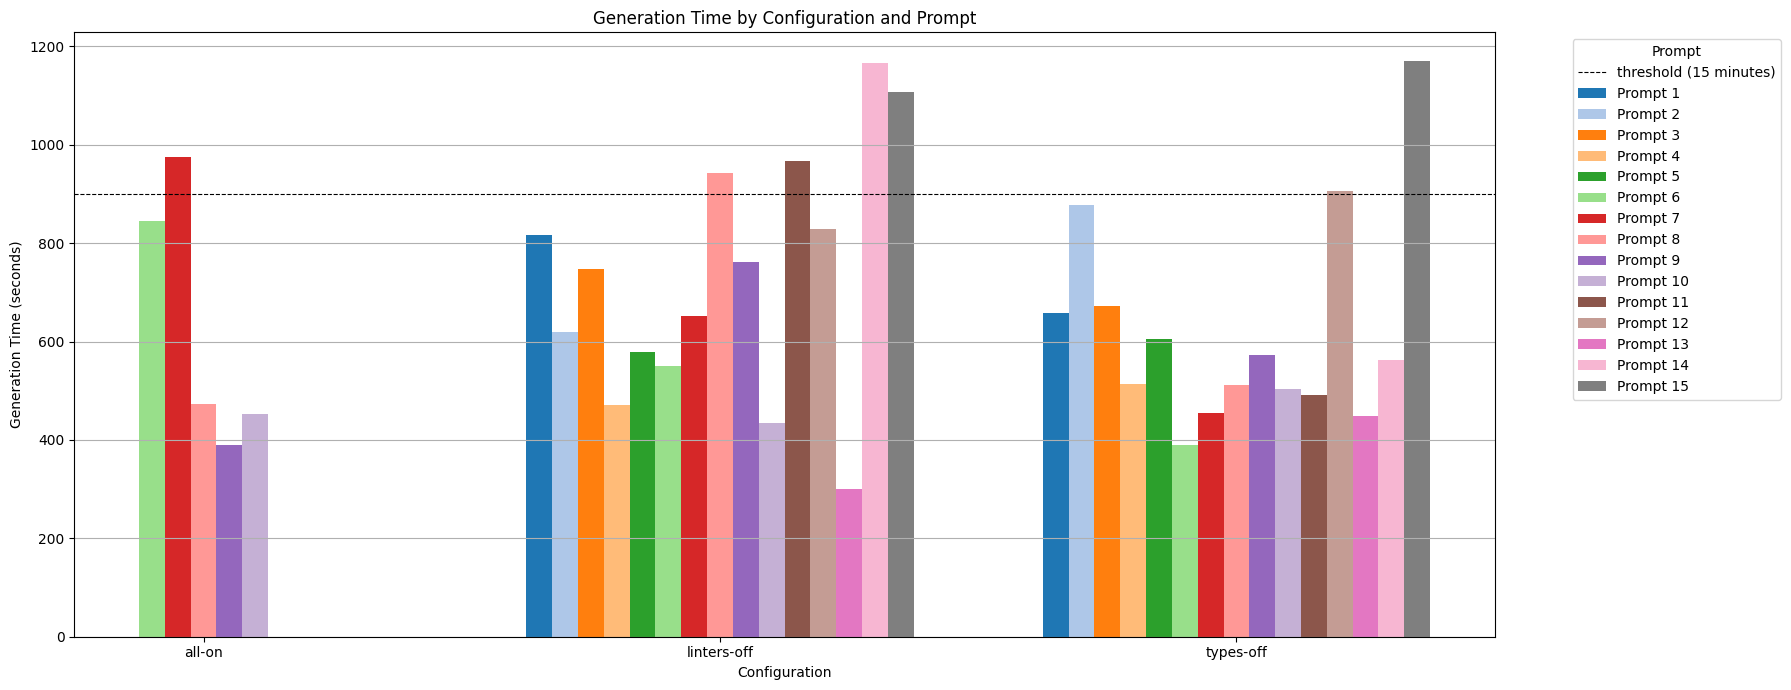

In [11]:
prompts_to_plot = sorted(data['prompt_id'].unique())

plot_data = data[data['prompt_id'].isin(prompts_to_plot)]

configs = sorted(plot_data['config'].unique())
num_configs = len(configs)
num_prompts = len(prompts_to_plot)

gen_time_matrix = np.zeros((num_configs, num_prompts))
for i, config in enumerate(configs):
    for j, prompt in enumerate(prompts_to_plot):
        val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)]['gen_time_seconds']
        gen_time_matrix[i, j] = val.values[0] if not val.empty else np.nan

palette = sns.color_palette("tab20", num_prompts)

bar_width = 0.05
x = np.arange(num_configs)

plt.figure(figsize=(18, 7))
for j in range(num_prompts):
    plt.bar(x + j * bar_width, gen_time_matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

plt.xlabel('Configuration')
plt.ylabel('Generation Time (seconds)')
plt.title('Generation Time by Configuration and Prompt')
plt.axhline(y=900, color='black', linewidth=0.8, linestyle='--', label='threshold (15 minutes)')
plt.xticks(x + bar_width * (num_prompts - 1) / 2, configs)
plt.legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

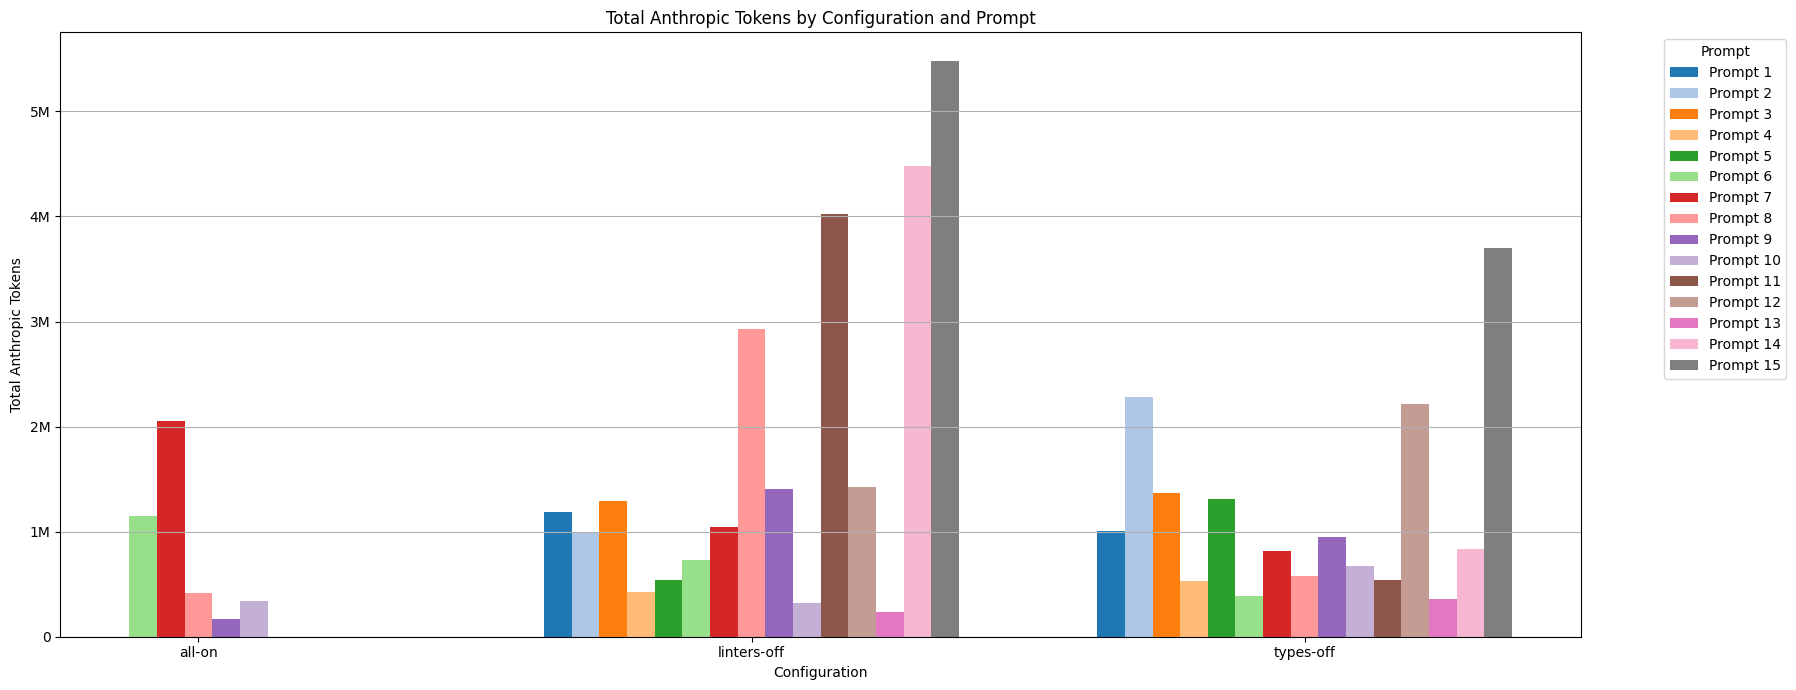

In [12]:
tokens_matrix = np.zeros((num_configs, num_prompts))
for i, config in enumerate(configs):
    for j, prompt in enumerate(prompts_to_plot):
        val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)]['anthropic_total_tokens']
        tokens_matrix[i, j] = val.values[0] if not val.empty else np.nan

plt.figure(figsize=(18, 7))
for j in range(num_prompts):
    plt.bar(x + j * bar_width, tokens_matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

plt.xlabel('Configuration')
plt.ylabel('Total Anthropic Tokens')
plt.title('Total Anthropic Tokens by Configuration and Prompt')
plt.xticks(x + bar_width * (num_prompts - 1) / 2, configs)
plt.legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

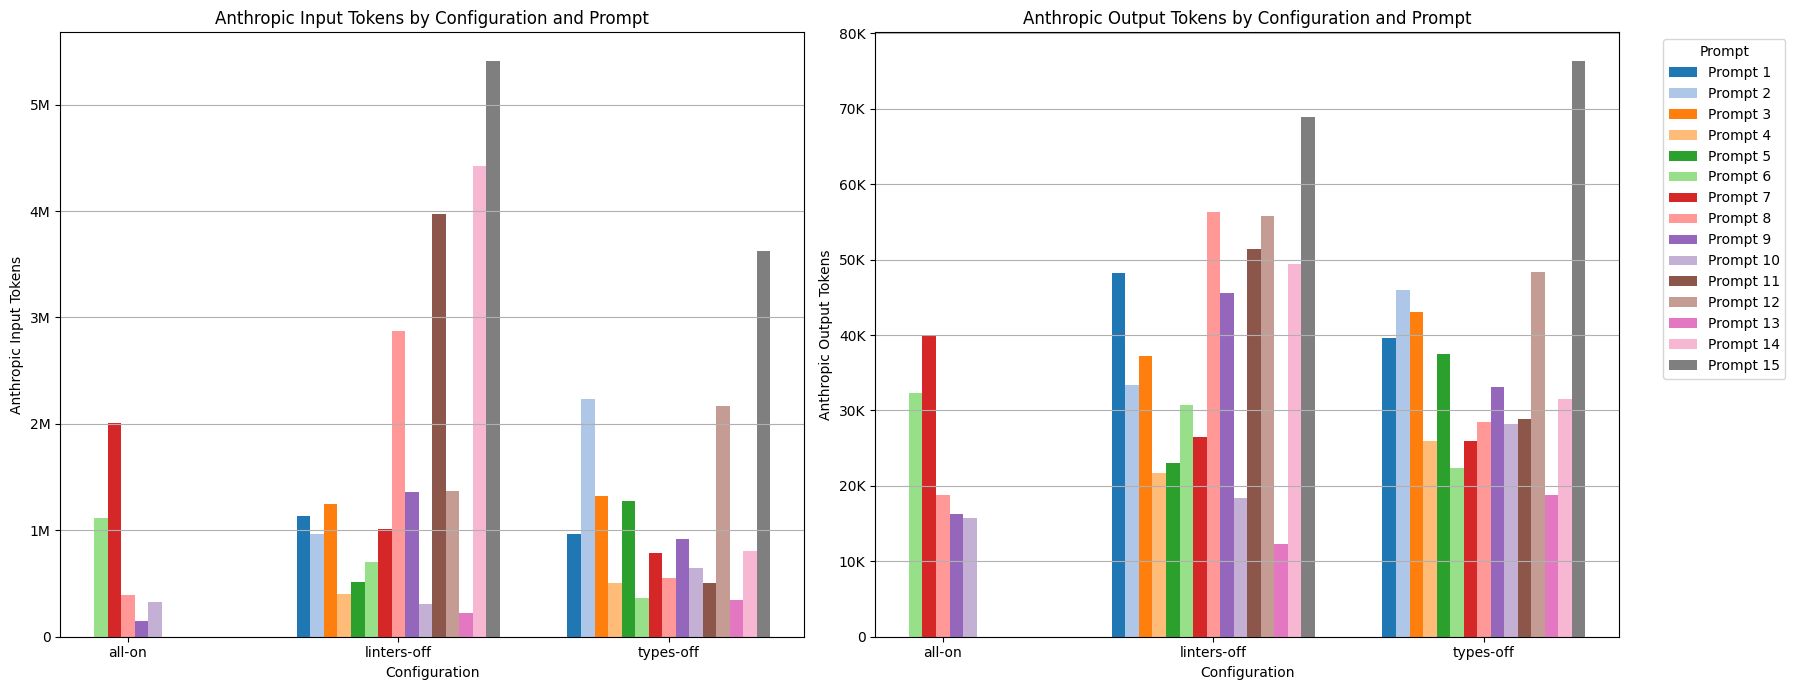

In [13]:
prompts_to_plot = sorted(data['prompt_id'].unique())
plot_data = data[data['prompt_id'].isin(prompts_to_plot)]
configs = sorted(plot_data['config'].unique())
num_configs = len(configs)
num_prompts = len(prompts_to_plot)
palette = sns.color_palette("tab20", num_prompts)

def plot_grouped_bars(ax, metric_col, ylabel, title):
    matrix = np.zeros((num_configs, num_prompts))
    for i, config in enumerate(configs):
        for j, prompt in enumerate(prompts_to_plot):
            val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)][metric_col]
            matrix[i, j] = val.values[0] if not val.empty else np.nan

    bar_width = 0.05
    x = np.arange(num_configs)

    for j in range(num_prompts):
        ax.bar(x + j * bar_width, matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

    ax.set_xlabel('Configuration')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (num_prompts - 1) / 2)
    ax.set_xticklabels(configs)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
    ax.grid(axis='y')

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

plot_grouped_bars(axes[0], 'anthropic_input_tokens', 'Anthropic Input Tokens', 'Anthropic Input Tokens by Configuration and Prompt')
plot_grouped_bars(axes[1], 'anthropic_output_tokens', 'Anthropic Output Tokens', 'Anthropic Output Tokens by Configuration and Prompt')

axes[1].legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

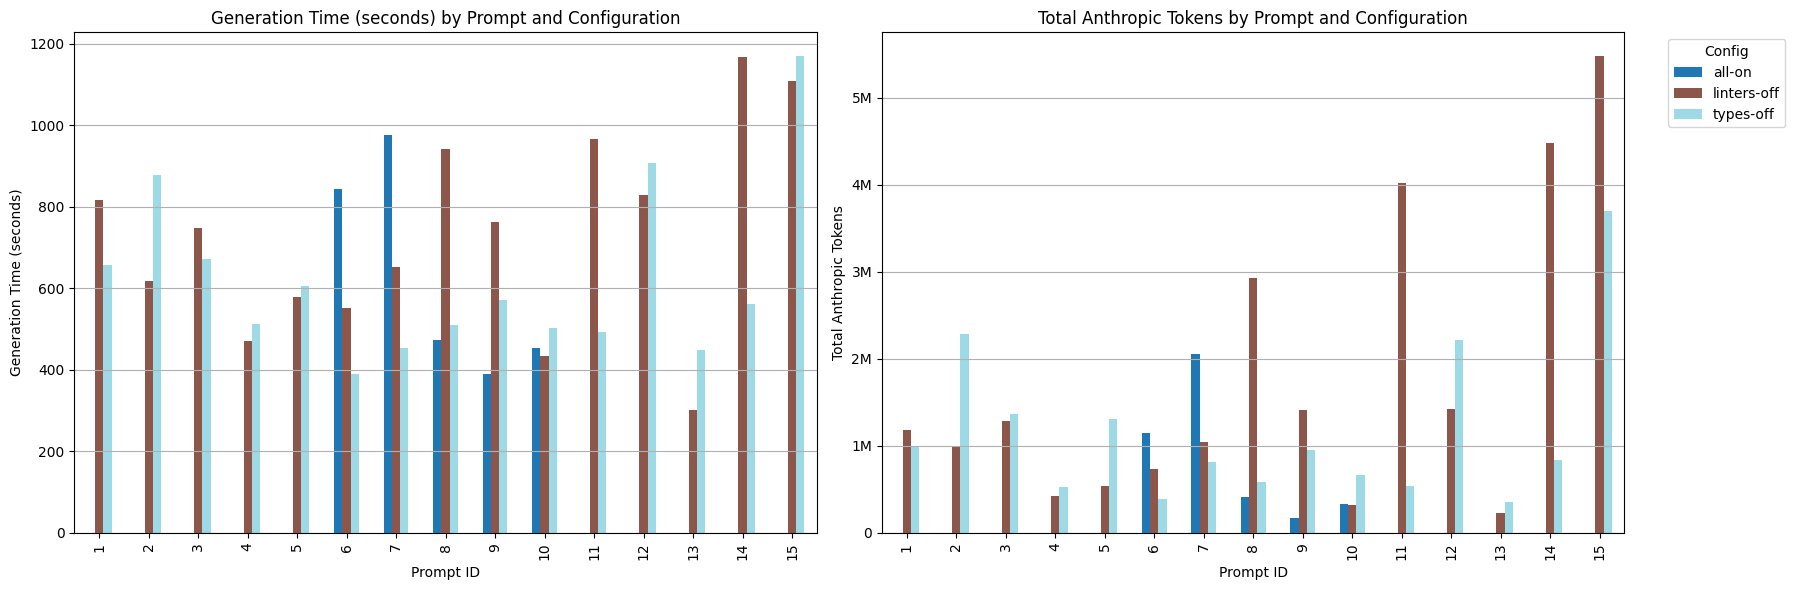

In [14]:
import matplotlib.pyplot as plt

pivot_time = data.pivot(index='prompt_id', columns='config', values='gen_time_seconds')
pivot_tokens = data.pivot(index='prompt_id', columns='config', values='anthropic_total_tokens')

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

pivot_time.plot(kind='bar', stacked=False, colormap='tab20', ax=axes[0])
axes[0].set_title('Generation Time (seconds) by Prompt and Configuration')
axes[0].set_xlabel('Prompt ID')
axes[0].set_ylabel('Generation Time (seconds)')
axes[0].grid(axis='y')

pivot_tokens.plot(kind='bar', stacked=False, colormap='tab20', ax=axes[1])
axes[1].set_title('Total Anthropic Tokens by Prompt and Configuration')
axes[1].set_xlabel('Prompt ID')
axes[1].set_ylabel('Total Anthropic Tokens')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
axes[1].grid(axis='y')

axes[1].legend(title='Config', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()

plt.tight_layout()
plt.show()

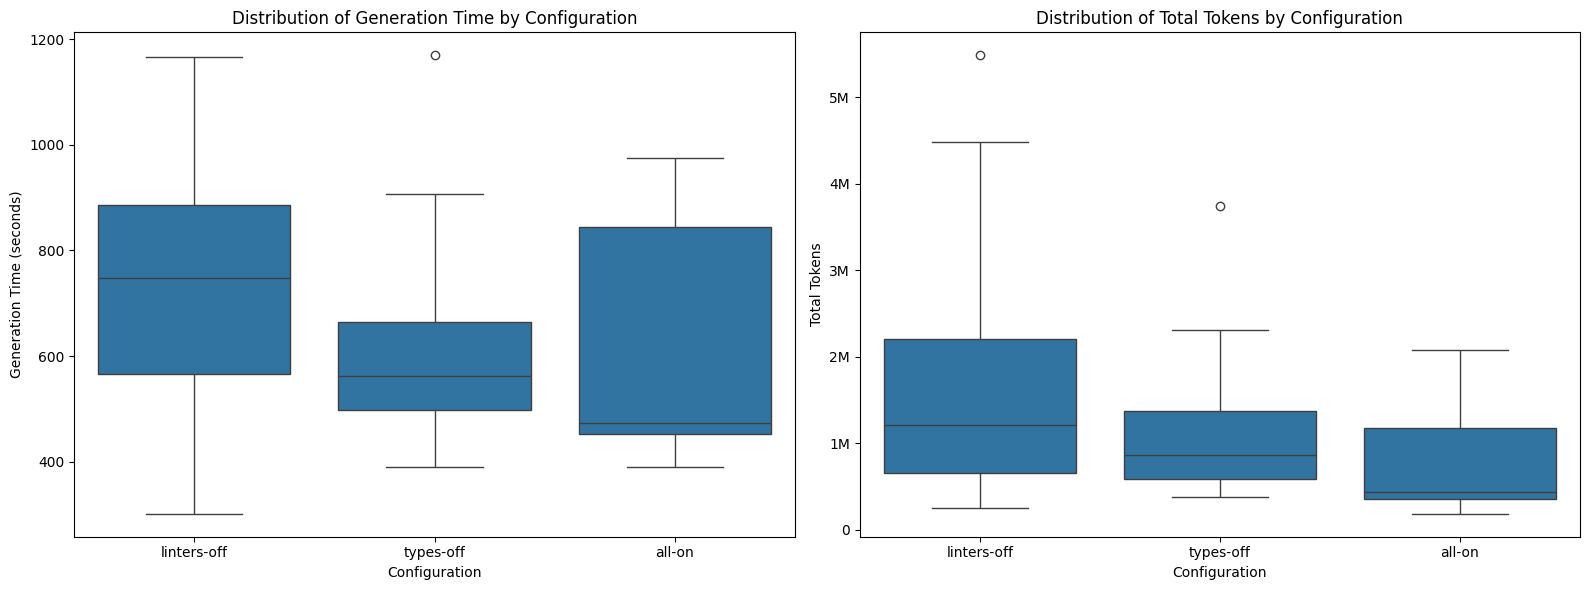

In [15]:
data_copy = data.copy()

data_copy['total_tokens'] = data_copy['gemini_total_tokens'] + data_copy['anthropic_total_tokens']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='config', y='gen_time_seconds', data=data_copy, ax=axes[0])
axes[0].set_title('Distribution of Generation Time by Configuration')
axes[0].set_xlabel('Configuration')
axes[0].set_ylabel('Generation Time (seconds)')

sns.boxplot(x='config', y='total_tokens', data=data_copy, ax=axes[1])
axes[1].set_title('Distribution of Total Tokens by Configuration')
axes[1].set_xlabel('Configuration')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
axes[1].set_ylabel('Total Tokens')

plt.tight_layout()
plt.show()

#### Left plot: Distribution of Generation Time (in seconds) by Configuration.
- The median generation time is highest for linters-off, followed by all-on, and lowest for types-off.
- linters-off has a wider spread and some high outliers.
- types-off has a tighter distribution with fewer outliers.
- all-on shows a moderate spread with some outliers.

#### Right plot: Distribution of Total Tokens by Configuration.
- The total tokens are highest for linters-off, followed by types-off, and lowest for all-on.
- The y-axis scale is large (up to millions), indicating a wide range of token counts.
- There are some significant outliers in both linters-off and types-off.
- all-on has a more compact distribution with fewer extreme values.

*Overall, the plots suggest that the all-on configuration tends to have lower generation time and total tokens compared to the other configurations, while linters-off tends to have the highest values and more variability.*

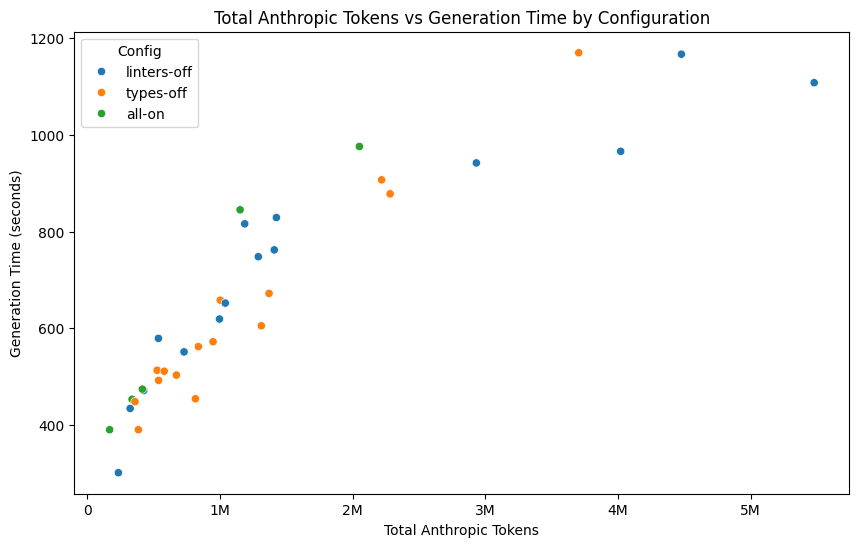

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anthropic_total_tokens', y='gen_time_seconds', hue='config', data=data, palette='tab10')
plt.title('Total Anthropic Tokens vs Generation Time by Configuration')
plt.xlabel('Total Anthropic Tokens')
plt.ylabel('Generation Time (seconds)')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(human_format))
plt.legend(title='Config')
plt.show()


#### Scatter-plot Observations:
- Blue (linters-off): Disabling linters results in the highest generation times, reflecting substantial processing demands and additional api calls.
- Green (all-on): Enabling all checks leads to the fastest generation times with minimal variation, demonstrating improved performance and scalability.
- Orange (types-off): With type checks disabled, generation times fall between the other two configurations, showing moderate processing overhead.

---
## Conclusion:

#### Everything on: 
- On an average takes less time to execute, ~475 seconds (linters fix the errors instead of needing more API calls)
- Has highest success rate ~100%
- Generated web-applications have almost none or minor bugs.

#### Linter checks off:
- On average takes ~750 seconds to execute
- Success rate is around 80%
- Generated web-applications have minor to moderate bugs.

#### Type checks off:
- On average takes ~562 seconds to execute
- Success rate is around 90%
- Successfully generated web applications for most prompts, except for the one involving Pygame, which was not implemented, and encountered difficulties adding items in prompt_15.